Problem Statement
We are given detailed information about residential homes in Ames, Iowa.
The task is to predict the final sale price of each house based on its physical characteristics, quality ratings, location, and construction details.

This is a supervised learning regression problem with mixed numerical and
categorical features.

In [1]:
import pandas as pd
import numpy as np

LOADING DATASET + DATASET DETAILS

In [2]:
housing_data=pd.read_csv("AmesHousing.csv")
housing_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
price_raw=housing_data["SalePrice"]
attributes_raw=housing_data.drop(["Order","SalePrice"],axis=1)

In [5]:
attributes_raw.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


A  – Agriculture
C  – Commercial
FV – Floating Village Residential
I  – Industrial
RH – Residential High Density
RL – Residential Low Density
RP – Residential Low Density Park
RM – Residential Medium Density

In [7]:
numerical_attributes_raw=attributes_raw.select_dtypes(include=['int64','float64']).columns
categorical_attributes_raw=attributes_raw.select_dtypes(include=['object']).columns
print(numerical_attributes_raw)
categorical_attributes_raw

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')


Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [8]:
ordinal_features = [
    "OverallQual", "OverallCond",
    "ExterQual", "ExterCond",
    "BsmtQual", "BsmtCond",
    "HeatingQC", "KitchenQual",
    "FireplaceQu", "GarageQual",
    "GarageCond", "PoolQC"
]

In [12]:
for col in categorical_attributes_raw:
    print(f"\nColumn: {col}")
    print(attributes_raw[col].value_counts())


Column: MS Zoning
MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64

Column: Street
Street
Pave    2918
Grvl      12
Name: count, dtype: int64

Column: Alley
Alley
Grvl    120
Pave     78
Name: count, dtype: int64

Column: Lot Shape
Lot Shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: count, dtype: int64

Column: Land Contour
Land Contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64

Column: Utilities
Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype: int64

Column: Lot Config
Lot Config
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: count, dtype: int64

Column: Land Slope
Land Slope
Gtl    2789
Mod     125
Sev      16
Name: count, dtype: int64

Column: Neighborhood
Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawye

In [36]:
housing_data.shape

(2930, 82)

In [34]:
housing_data["SalePrice"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

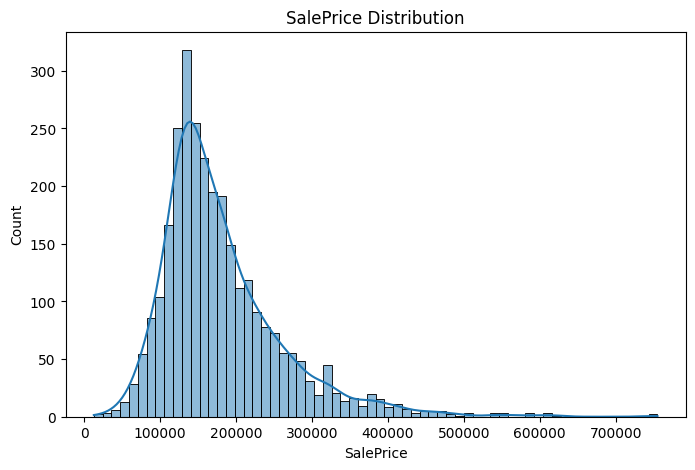

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(price_raw,kde=True)
plt.title("SalePrice Distribution")
plt.show()

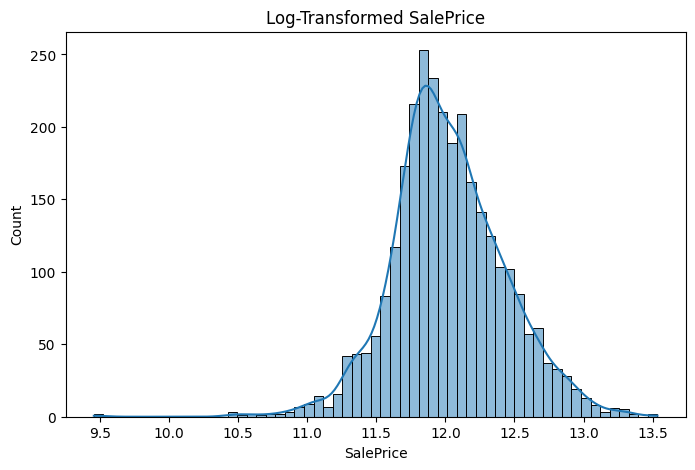

In [15]:
price_log = np.log1p(price_raw)

plt.figure(figsize=(8,5))
sns.histplot(price_log, kde=True)
plt.title("Log-Transformed SalePrice")
plt.show()

In [20]:
corr=housing_data.corr(numeric_only=True)["SalePrice"].abs()
top_numeric = corr.sort_values(ascending=False).head(11)
print(top_numeric)

SalePrice         1.000000
Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647877
Garage Area       0.640401
Total Bsmt SF     0.632280
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Garage Yr Blt     0.526965
Name: SalePrice, dtype: float64


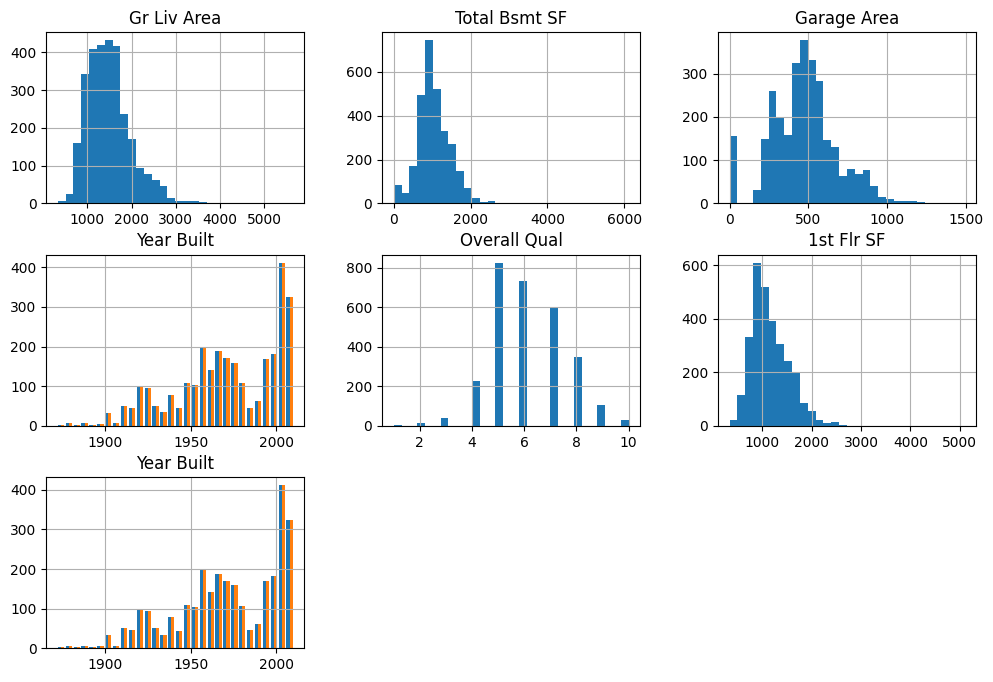

In [24]:
imp_num=["Gr Liv Area", "Total Bsmt SF", "Garage Area","Year Built", "Overall Qual","1st Flr SF","Year Built"]
attributes_raw[imp_num].hist(
    figsize=(12,8), bins=30
)
plt.show()

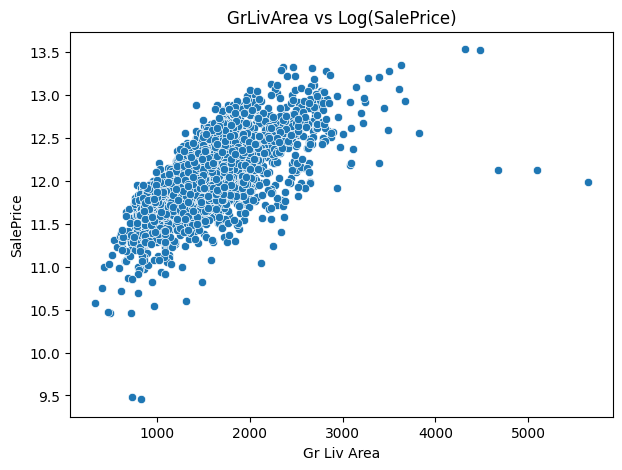

0.6958629302740817


In [29]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=attributes_raw["Gr Liv Area"], y=price_log)
plt.title("GrLivArea vs Log(SalePrice)")
plt.show()
print(housing_data["Gr Liv Area"].corr(price_log))


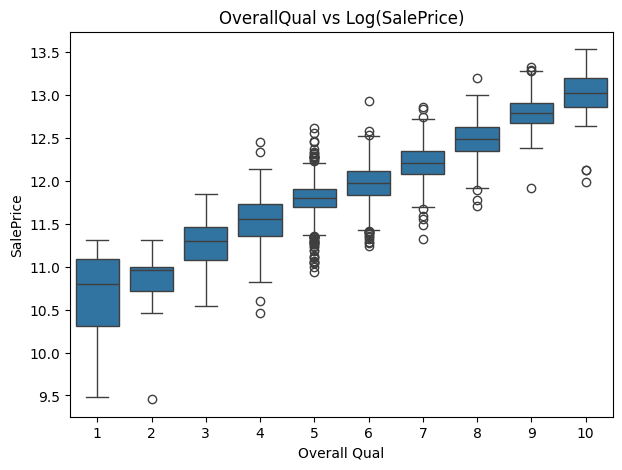

In [31]:
plt.figure(figsize=(7,5))
sns.boxplot(x=attributes_raw["Overall Qual"], y=price_log)
plt.title("OverallQual vs Log(SalePrice)")
plt.show()

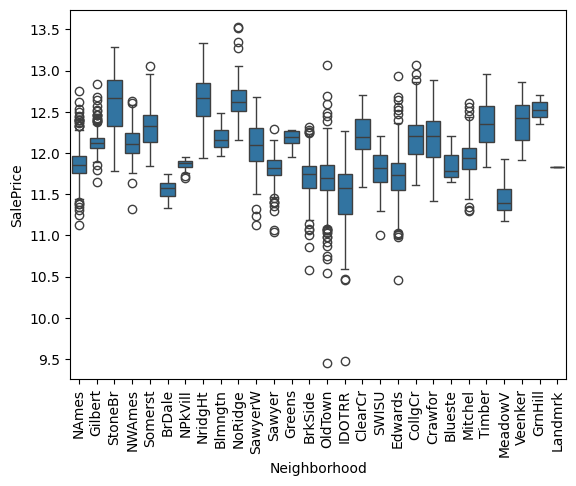

In [37]:
sns.boxplot(
    x=housing_data["Neighborhood"],
    y=np.log1p(housing_data["SalePrice"])
)
plt.xticks(rotation=90)
plt.show()
